<a href="https://colab.research.google.com/github/nawwafansyori/Data_Analytics/blob/main/Tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d piterfm/2022-ukraine-russian-war

  0% 0.00/1.53k [00:00<?, ?B/s]
100% 1.53k/1.53k [00:00<00:00, 210kB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  2022-ukraine-russian-war.zip
  inflating: russia_losses_equipment.csv  
  inflating: russia_losses_personnel.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('russia_losses_equipment.csv',parse_dates=['date'])

In [ ]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [ ]:
df.shape

(36, 15)

In [ ]:
# df['month']=df['date'].dt.month_name()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   36 non-null     datetime64[ns]
 1   day                    36 non-null     int64         
 2   aircraft               36 non-null     int64         
 3   helicopter             36 non-null     int64         
 4   tank                   36 non-null     int64         
 5   APC                    36 non-null     int64         
 6   field artillery        36 non-null     int64         
 7   MRL                    36 non-null     int64         
 8   military auto          36 non-null     int64         
 9   fuel tank              36 non-null     int64         
 10  drone                  36 non-null     int64         
 11  naval ship             36 non-null     int64         
 12  anti-aircraft warfare  36 non-null     int64         
 13  special

In [ ]:
df.isnull().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000
mean,19.500000,75.222222,87.000000,393.027778,1266.055556,179.611111,62.555556,711.416667,64.194444,24.000000,3.611111,33.00000,7.777778,0.722222
std,10.535654,38.078949,39.970704,156.654212,352.870429,89.416291,26.713768,350.598132,6.773138,27.165104,1.809148,17.65705,8.931841,1.523363
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.00000,0.000000,0.000000
25%,10.750000,42.750000,46.000000,281.000000,975.000000,108.000000,50.000000,437.500000,60.000000,3.750000,2.000000,20.50000,0.000000,0.000000
50%,19.500000,79.000000,92.500000,396.500000,1264.000000,150.000000,64.000000,628.500000,60.000000,8.500000,3.000000,35.00000,0.000000,0.000000
75%,28.250000,102.750000,124.000000,520.250000,1582.750000,270.250000,80.500000,1014.250000,70.500000,44.000000,4.000000,47.00000,15.250000,0.000000
max,37.000000,143.000000,131.000000,625.000000,1751.000000,316.000000,96.000000,1220.000000,85.000000,83.000000,7.000000,54.00000,24.000000,4.000000


In [ ]:
df.corr()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
day,1.000000,0.993125,0.964101,0.995440,0.990615,0.986714,0.958617,0.990944,0.798173,0.887784,0.861915,0.974812,0.922092,0.681814
aircraft,0.993125,1.000000,0.953531,0.986305,0.984120,0.981458,0.932995,0.984061,0.800538,0.888532,0.860211,0.958540,0.931095,0.688684
helicopter,0.964101,0.953531,1.000000,0.973543,0.977529,0.937309,0.944774,0.960098,0.649679,0.756382,0.747545,0.985638,0.836947,0.514277
tank,0.995440,0.986305,0.973543,1.000000,0.995622,0.979903,0.973043,0.990615,0.762992,0.855848,0.836887,0.985169,0.901023,0.642600
APC,0.990615,0.984120,0.977529,0.995622,1.000000,0.977866,0.967330,0.993209,0.737329,0.835030,0.806432,0.983951,0.899975,0.609674
field artillery,0.986714,0.981458,0.937309,0.979903,0.977866,1.000000,0.936942,0.991963,0.828264,0.908780,0.862006,0.947629,0.961509,0.679629
MRL,0.958617,0.932995,0.944774,0.973043,0.967330,0.936942,1.000000,0.960826,0.690554,0.787161,0.785552,0.978738,0.823058,0.592253
military auto,0.990944,0.984061,0.960098,0.990615,0.993209,0.991963,0.960826,1.000000,0.772855,0.866191,0.831301,0.972319,0.935515,0.645863
fuel tank,0.798173,0.800538,0.649679,0.762992,0.737329,0.828264,0.690554,0.772855,1.000000,0.955626,0.890052,0.669410,0.871150,0.811192
drone,0.887784,0.888532,0.756382,0.855848,0.835030,0.908780,0.787161,0.866191,0.955626,1.000000,0.946457,0.775795,0.933562,0.861652


In [ ]:
col = [ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']

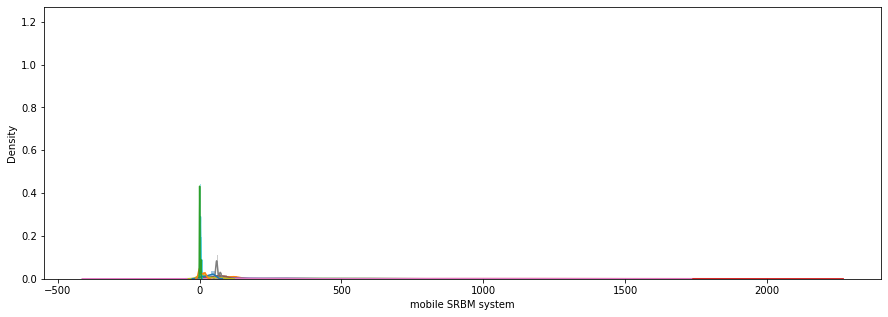

In [ ]:
plt.figure(figsize=(15,5))
for i in col:
    sns.distplot(df[i])

In [ ]:
import plotly.figure_factory as ff
hist_data = []
group_labels = []

for i in col:
    hist_data.append(df[i])
    group_labels.append(i)

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,.1, .25, .5, 1,1])
fig.show()

In [ ]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
      dtype='object')

In [ ]:
col = [ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']

In [ ]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
for i in col:
    fig.add_trace(go.Scatter(x=df['date'], y=df[i], mode='lines+markers',name=i,))

fig.show()

In [ ]:
fig = go.Figure()
for i in col:
    fig.add_trace(go.Scatter(x=df['day'], y=df[i], mode='lines',name=i,))

fig.show()

In [ ]:
df.sort_values(by='aircraft',ascending=False).head(10)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
35,2022-04-01,37,143,131,625,1751,316,96,1220,85,83,7,54,24.0,4.0
34,2022-03-31,36,135,131,614,1735,311,96,1201,75,83,7,54,22.0,4.0
33,2022-03-30,35,131,131,605,1723,305,96,1184,75,81,7,54,21.0,4.0
32,2022-03-29,34,127,129,597,1710,303,96,1178,73,71,7,54,21.0,4.0
31,2022-03-28,33,123,127,586,1694,302,95,1150,73,66,7,54,21.0,4.0
30,2022-03-27,32,121,127,582,1664,294,93,1144,73,56,7,52,21.0,4.0
29,2022-03-26,31,117,127,575,1640,293,91,1131,73,56,7,51,19.0,2.0
28,2022-03-25,30,115,125,561,1625,291,90,1089,72,53,5,49,18.0,0.0
27,2022-03-24,29,108,124,530,1597,280,82,1033,72,50,4,47,16.0,0.0
26,2022-03-23,28,101,124,517,1578,267,80,1008,70,42,4,47,15.0,0.0


In [ ]:
df.sum().sort_values().sum()

105397.0

Text(0.5, 1.0, 'Destroyed Equepments')

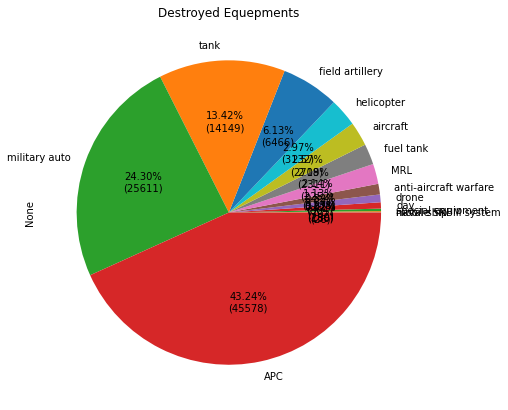

In [ ]:
plt.figure(figsize=(7,7))
df.sum().sort_values().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df.sum().sort_values().sum())))
plt.title('Destroyed Equepments')

In [ ]:
def num2MB(num):
    '''
        num: int, float
        it will return values like thousands(10K), Millions(10M),Billions(1B)
        '''
    if num < 1000: return int(num)
    if num >= 1000 and num < 1000000:return f'{float("%.1f" %(num/1000))}K'
    elif num>= 1000000 and num < 1000000000: return f'{float("%.1f" %(num/1000000))}M'
    else: return f'{float("%.1f" %(num/1000000000))}B'
    
def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0] # total no of rows in data
    
    ax = sns.barplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value':
            b = num2MB(a)
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.2f}%'.format(num2MB(a),(a/total_data)*100)
        else:
            b = ''
 
        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) # shift+tab for more parameter
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

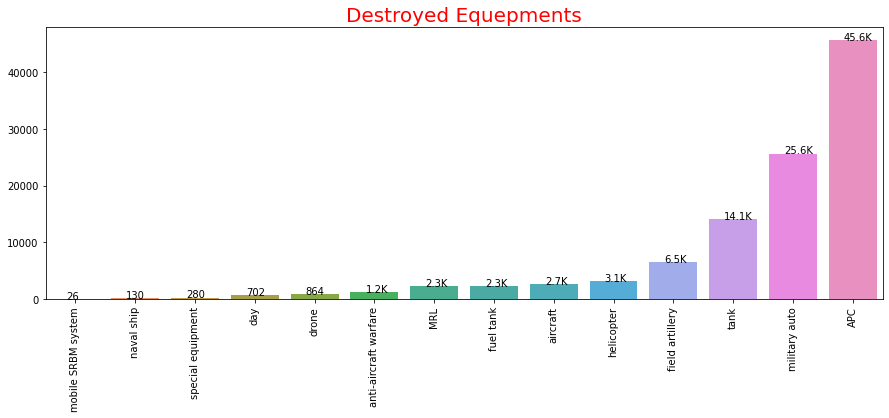

In [ ]:
plt.figure(figsize=(15,5))
myBarPlot(df.sum().sort_values().index,df.sum().sort_values().values,val_per='value', title='Destroyed Equepments')


In [ ]:
df2 = pd.read_csv('russia_losses_personnel.csv',parse_dates=['date'])

In [ ]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [ ]:
df2.shape

(36, 5)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        36 non-null     datetime64[ns]
 1   day         36 non-null     int64         
 2   personnel   36 non-null     int64         
 3   personnel*  36 non-null     object        
 4   POW         36 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.5+ KB


In [ ]:
df2.isnull().sum()

date          0
day           0
personnel     0
personnel*    0
POW           0
dtype: int64

In [ ]:
df2.duplicated().sum()

0

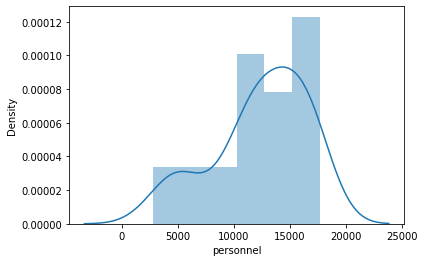

In [ ]:
sns.distplot(df2['personnel'])

In [ ]:
df2['personnel*'].value_counts()

about    30
more      6
Name: personnel*, dtype: int64

In [ ]:
df2['POW'].value_counts()

389    6
405    5
0      4
200    4
412    4
421    2
430    2
459    2
216    1
232    1
259    1
284    1
360    1
371    1
411    1
Name: POW, dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df2['date'], y=df2['personnel'], mode='lines+markers',name=i,))

fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df2, x='date', y='personnel', color='personnel*', symbol="personnel*")
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [ ]:
fig = px.line(df2, x='date', y='POW', color='POW', symbol="POW")

fig.show()

In [ ]:
df2.sort_values(by='personnel',ascending=False).head(10)

,date,day,personnel,personnel*,POW
35,2022-04-01,37,17700,about,459
34,2022-03-31,36,17500,about,459
33,2022-03-30,35,17300,about,430
32,2022-03-29,34,17200,about,430
31,2022-03-28,33,17000,about,421
30,2022-03-27,32,16600,about,421
29,2022-03-26,31,16400,about,412
28,2022-03-25,30,16100,about,412
27,2022-03-24,29,15800,about,412
26,2022-03-23,28,15600,about,412


In [ ]:
df2.sort_values(by='personnel').head(10)

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200
5,2022-03-02,7,5840,about,200
6,2022-03-03,8,9000,about,200
7,2022-03-04,9,9166,about,200
8,2022-03-05,10,10000,about,216
9,2022-03-06,11,11000,about,232


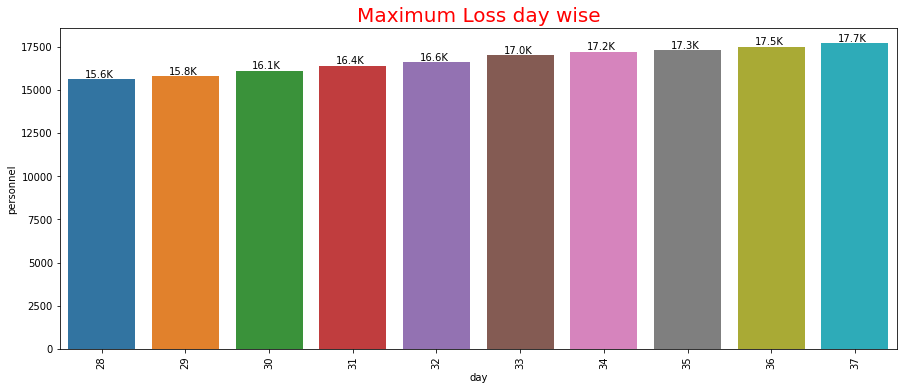

In [ ]:
plt.figure(figsize=(15,13))
plt.subplot(211)
myBarPlot(df2.sort_values(by='personnel',ascending=False).head(10)['day'],df2.sort_values(by='personnel',ascending=False).head(10)['personnel'],val_per='value',x_pos=0.2,y_pos=100,title='Maximum Loss day wise')


In [ ]:
df2.sort_values(by='personnel',ascending=False).head(10)

,date,day,personnel,personnel*,POW
35,2022-04-01,37,17700,about,459
34,2022-03-31,36,17500,about,459
33,2022-03-30,35,17300,about,430
32,2022-03-29,34,17200,about,430
31,2022-03-28,33,17000,about,421
30,2022-03-27,32,16600,about,421
29,2022-03-26,31,16400,about,412
28,2022-03-25,30,16100,about,412
27,2022-03-24,29,15800,about,412
26,2022-03-23,28,15600,about,412
